In [1]:
from torch.utils.tensorboard import SummaryWriter

In [56]:
import torch
import numpy as np
import random


In [156]:
def y_data(tmp_x1,tmp_x2):
    y = tmp_x1**2 +  2*tmp_x2
    return y

from torch.utils.data import Dataset
from torch import  FloatTensor
class UserDataset(Dataset):
    def __init__(self, doc="dataset"):
        self.doc = doc
        x1 = list(range(0,100,3))
        self.x1 =  FloatTensor(x1).view(-1, 1)
        x2 = list(range(0,100,3))
        self.x2 =  FloatTensor(x2).view(-1, 1)
        y = list(map(y_data,x1,x2))
        self.y = FloatTensor(y).view(-1, 1)
 
    def __getitem__(self,index):
        return self.x1[index], self.x2[index],self.y[index]
    
    def __len__(self):
        return len(self.x1)

In [157]:
## 随机种子设置，每次执行后再训练模型可以得到相同loss
random.seed(3407)
np.random.seed(3407)
torch.manual_seed(3407) 

In [158]:
from torch.utils.data import DataLoader
user_dataset = UserDataset()
user_loader = DataLoader(user_dataset, batch_size=32, shuffle=True)

In [165]:
import torch.nn as nn
class reg_model(nn.Module):
    def __init__(self, in_dim, out_dim=1):
        super(reg_model, self).__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
#         self.model = nn.Sequential(nn.Linear(in_dim, 16), nn.ReLU(),nn.Linear(16, out_dim))
        self.fc1 = nn.Linear(2, 16)
        self.act   = nn.ReLU()
        self.fc2 = nn.Linear(16, out_dim)
        
    def forward(self,x1, x2):
#         y = self.model(x)
        x = torch.cat((x1, x2), dim=1)
        x = self.fc1(x)
        x = self.act(x)
        y = self.fc2(x)
        return y

In [166]:
from torch import optim
import torch
model = reg_model(1,1)
criterior = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)
writer = SummaryWriter(log_dir=r"G:\ML\PYLearn\jupyter\log")
for i in range(2):
    for data in user_loader:
        x1,x2, y = data
        optimizer.zero_grad()
        pred_y = model(x1,x2)
        loss = criterior(pred_y, y)
        loss.backward()
        optimizer.step()
    for param_tensor in model.state_dict():  # 字典的遍历默认是遍历 key，所以param_tensor实际上是键值
        print(param_tensor, '\t', model.state_dict()[param_tensor])
    print("------------------loss------------------", loss.detach().numpy())
#         writer.add_scalar("train_loss", loss,i)
#     for name, parms in model.named_parameters(): 
#         print('-->name:', name, '-->grad_requirs:',parms, \
#          ' -->grad_value:',parms.grad)
#     for param_tensor in model.state_dict():  # 字典的遍历默认是遍历 key，所以param_tensor实际上是键值
#         print(param_tensor, '\t', model.state_dict()[param_tensor])


fc1.weight 	 tensor([[ 0.8051,  0.1852],
        [-0.0143, -0.3706],
        [-0.1658, -0.3697],
        [ 0.6931,  0.6699],
        [ 0.3553, -0.4148],
        [-0.2873,  0.4085],
        [ 0.1995,  0.1925],
        [-0.5107,  0.3811],
        [ 0.0084, -0.5999],
        [ 0.2814, -0.5011],
        [-0.6948,  0.1882],
        [-0.3664, -0.5535],
        [-0.4561, -0.3076],
        [-0.2097, -0.0670],
        [ 0.7477, -0.2340],
        [ 0.4823,  0.3632]])
fc1.bias 	 tensor([-0.1198,  0.1345,  0.7177, -0.1140, -0.0241,  0.4484,  0.3944,  0.1241,
         0.3743, -0.7536, -0.5818, -0.2338,  0.3501,  0.2542,  0.3910,  0.8832])
fc2.weight 	 tensor([[ 0.3047,  0.0881,  0.2861,  0.3448,  0.0718, -0.0197,  0.1823,  0.0657,
          0.3191, -0.0576, -0.1064,  0.0898,  0.2028,  0.4001,  0.3158,  0.2984]])
fc2.bias 	 tensor([0.0565])
------------------loss------------------ 29547948.0
fc1.weight 	 tensor([[ 0.9989,  0.3789],
        [-0.1085, -0.4649],
        [-0.1658, -0.3697],
        [ 0.

In [168]:
writer.add_graph(model, (x1,x2))
writer.close()

In [21]:
model.state_dict().keys

odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias'])

In [40]:
x = list(range(0,100))
y = list(map(y_data, x))
x = torch.unsqueeze(FloatTensor(x),dim=1)
model.eval()
with torch.no_grad():
    pred_y = model(x)

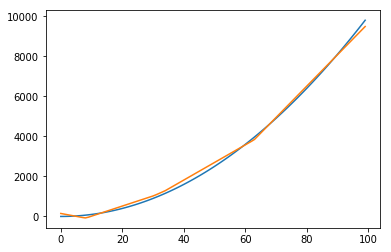

In [41]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.plot(x, pred_y.detach().numpy())

In [47]:
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

Model's state_dict:
fc1.weight 	 torch.Size([16, 1])
fc1.bias 	 torch.Size([16])
fc2.weight 	 torch.Size([1, 16])
fc2.bias 	 torch.Size([1])


In [49]:
optimizer.state_dict?

Signature: optimizer.state_dict()
Docstring:
Returns the state of the optimizer as a :class:`dict`.

It contains two entries:

* state - a dict holding current optimization state. Its content
    differs between optimizer classes.
* param_groups - a dict containing all parameter groups
File:      c:\programdata\anaconda3\lib\site-packages\torch\optim\optimizer.py
Type:      method


In [48]:
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Optimizer's state_dict:
state 	 {0: {'step': 6000, 'exp_avg': tensor([[ 3.4952e+04],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 5.6052e-45],
        [ 2.2232e+04],
        [-8.6573e+04],
        [ 4.2950e+04],
        [ 2.2401e+04],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [-1.0213e+05],
        [-1.3310e+05],
        [ 2.1657e+04],
        [ 0.0000e+00],
        [ 0.0000e+00]]), 'exp_avg_sq': tensor([[1.7020e+10],
        [0.0000e+00],
        [0.0000e+00],
        [3.4815e+04],
        [9.8124e+09],
        [1.4238e+11],
        [2.4256e+10],
        [9.9775e+09],
        [0.0000e+00],
        [0.0000e+00],
        [0.0000e+00],
        [1.4763e+11],
        [3.3066e+11],
        [9.3116e+09],
        [0.0000e+00],
        [0.0000e+00]])}, 1: {'step': 6000, 'exp_avg': tensor([ 3.8946e+02,  0.0000e+00,  0.0000e+00,  5.6052e-45,  1.9953e+02,
        -8.0688e+02,  4.7163e+02,  2.0104e+02,  0.0000e+00,  0.0000e+00,
         5.6052e-45, -2.

In [50]:
torch.save({
            'epoch': 1000,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            }, r"G:\ML\PYLearn\jupyter\log\model.pth")

In [52]:
checkpoint = torch.load(r"G:\ML\PYLearn\jupyter\log\model.pth")
# checkpoint

In [53]:
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

In [42]:
list(model.named_parameters())

[('fc1.weight', Parameter containing:
  tensor([[ 0.8607],
          [-0.4612],
          [ 1.1627],
          [ 0.6596],
          [-0.1963],
          [-0.2116],
          [-0.9390],
          [-0.6986],
          [ 1.1903],
          [-0.2990],
          [-0.2648],
          [ 1.0166],
          [ 0.5990],
          [ 0.3458],
          [ 1.3209],
          [-0.2365]], requires_grad=True)), ('fc1.bias', Parameter containing:
  tensor([-0.5419, -0.1460,  1.1332, -0.5549, -1.1715, -0.0499,  0.4957, -0.0812,
           0.3717, -0.2156, -0.5980,  0.3973, -0.7329, -0.0947,  0.6900, -0.8912],
         requires_grad=True)), ('fc2.weight', Parameter containing:
  tensor([[ 0.3370, -0.0976,  0.4735,  0.1556,  0.1632,  0.1524, -0.1927,  0.1632,
            0.4725,  0.0417, -0.0498,  0.3723,  0.1891,  0.3840,  0.5329,  0.0873]],
         requires_grad=True)), ('fc2.bias', Parameter containing:
  tensor([0.3488], requires_grad=True))]

In [31]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.8607],
         [-0.4612],
         [ 1.1627],
         [ 0.6596],
         [-0.1963],
         [-0.2116],
         [-0.9390],
         [-0.6986],
         [ 1.1903],
         [-0.2990],
         [-0.2648],
         [ 1.0166],
         [ 0.5990],
         [ 0.3458],
         [ 1.3209],
         [-0.2365]], requires_grad=True), Parameter containing:
 tensor([-0.5419, -0.1460,  1.1332, -0.5549, -1.1715, -0.0499,  0.4957, -0.0812,
          0.3717, -0.2156, -0.5980,  0.3973, -0.7329, -0.0947,  0.6900, -0.8912],
        requires_grad=True), Parameter containing:
 tensor([[ 0.3370, -0.0976,  0.4735,  0.1556,  0.1632,  0.1524, -0.1927,  0.1632,
           0.4725,  0.0417, -0.0498,  0.3723,  0.1891,  0.3840,  0.5329,  0.0873]],
        requires_grad=True), Parameter containing:
 tensor([0.3488], requires_grad=True)]